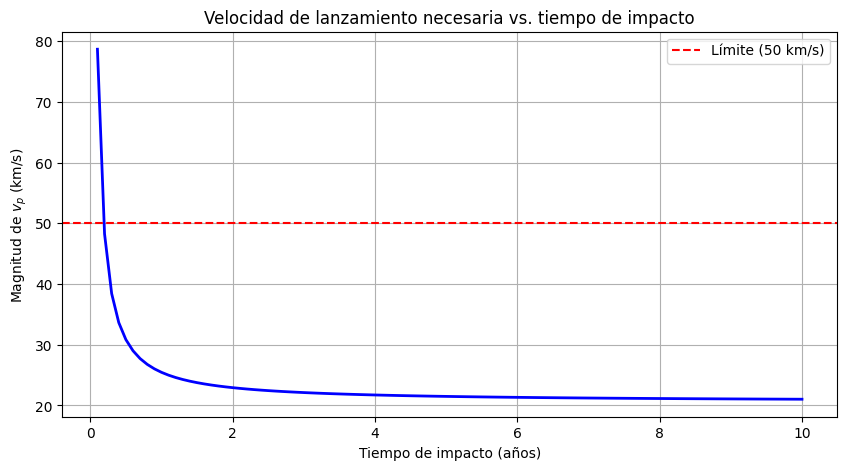

--- Resultados para t = 1.00 años ---
Vector v_p (km/s): [-2.29443649e+01  1.10321995e+01  2.02575190e-02]
Magnitud de v_p: 25.4589 km/s


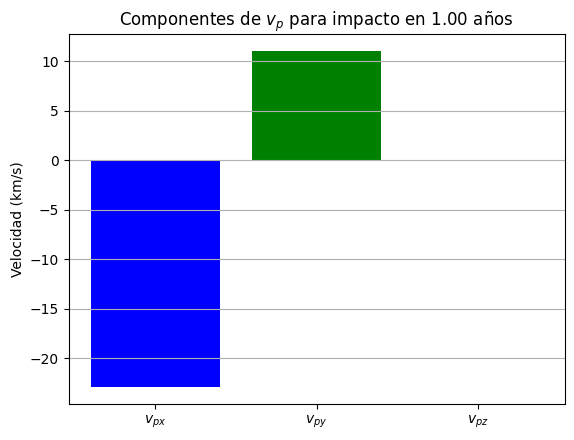

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
SECONDS_IN_YEAR = 3.15576e7  # segundos en un año
MAX_TIME = 10 * SECONDS_IN_YEAR  # tiempo máximo: 10 años

# Datos iniciales (posición en km, velocidad en km/s)
# Tierra
r_T = np.array([-1.3112578338e8, -7.5507634192e7, 3.0425664795e4])
v_T = np.array([1.14330508015e1, -2.5964546881e1, 7.9941675023e-4])

# Marte
r_M = np.array([-2.309032186e8, 9.4520480368e7, 7.6662920456e6])
v_M = np.array([-8.3495579277e0, -2.0320213209e1, -2.2090906863e-1])

# Función para calcular v_p dado un tiempo de impacto t
def calculate_vp(t):
    delta_r = r_M - r_T  # Vector diferencia de posiciones
    v_p = (delta_r / t) + v_M - v_T  # Fórmula teórica
    return v_p

# Rango de tiempos de impacto a evaluar (de 0.1 a 10 años)
t_values = np.linspace(0.1 * SECONDS_IN_YEAR, MAX_TIME, 100)
vp_magnitudes = []
vp_components = []

for t in t_values:
    v_p = calculate_vp(t)
    vp_magnitudes.append(np.linalg.norm(v_p))
    vp_components.append(v_p)

# Gráfico 1: Magnitud de v_p vs. tiempo de impacto
plt.figure(figsize=(10, 5))
plt.plot(t_values / SECONDS_IN_YEAR, vp_magnitudes, 'b-', linewidth=2)
plt.axhline(y=50, color='r', linestyle='--', label='Límite (50 km/s)')
plt.xlabel('Tiempo de impacto (años)')
plt.ylabel('Magnitud de $v_p$ (km/s)')
plt.title('Velocidad de lanzamiento necesaria vs. tiempo de impacto')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico 2: Componentes de v_p para un tiempo específico (ej. 1 año)
t_impact = 1.0 * SECONDS_IN_YEAR  # Tiempo de impacto deseado
v_p_impact = calculate_vp(t_impact)

print(f"--- Resultados para t = {t_impact / SECONDS_IN_YEAR:.2f} años ---")
print(f"Vector v_p (km/s): {v_p_impact}")
print(f"Magnitud de v_p: {np.linalg.norm(v_p_impact):.4f} km/s")

# Gráfico de barras para las componentes
components = ['$v_{px}$', '$v_{py}$', '$v_{pz}$']
plt.bar(components, v_p_impact, color=['blue', 'green', 'red'])
plt.ylabel('Velocidad (km/s)')
plt.title(f'Componentes de $v_p$ para impacto en {t_impact / SECONDS_IN_YEAR:.2f} años')
plt.grid(axis='y')
plt.show()